# Install the qiskit package

# Importing all modules

In [2]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Sampler, Options
from qiskit_aer.noise import NoiseModel

from qiskit.quantum_info import Statevector

from qiskit import IBMQ

%matplotlib inline

ImportError: cannot import name 'QiskitWarning' from 'qiskit.exceptions' (/home/niall/.local/lib/python3.10/site-packages/qiskit/exceptions.py)

# Creating a simple Quantum Circuit

There are two arguments:

* the number of *quantum* bits
* the number of *classical* bits

In [ ]:
circ1 = QuantumCircuit(2, 2)

If there is a single argument - it means the number of *quantum* bits

In [ ]:
circ2 = QuantumCircuit(2)

It is possible to add qubits to the circuit after it has been created:

In [ ]:
#Create an empty circuit:
circ3 = QuantumCircuit()
#Create quantum registers:
qr = QuantumRegister(3)
#Create classical registers:
cr = ClassicalRegister(3)
#Appending registers to the circuit:
circ3.add_bits(qr)
circ3.add_bits(cr)

# Applying quantum gates

In [ ]:
#Apply the Hadamard gate to the 0-qubit:
circ1.h(0)
#Apply the X-gate to the 1-qubit:
circ1.x(1)
#Apply the CNOT gate to 1 controlled by 0:
circ1.cx(0, 1)
#Add the measurement:
circ1.measure([0,1],[0,1]) # Another way to apply measurements for all qbits is *measure_all()* method

Draw the circuit:

In [ ]:
circ1.draw("mpl")

# Running your quantum circuit

## QiskitRuntimeService for Cloud Simulator and Quantum Hardware (CLOUD)



In [ ]:
# Local Simulator

# Use Aer's qasm_simulator
backend_qasm = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit to be 1024, which is the default.
num_shots    = 1024
job_qasm     = backend_qasm.run(transpile(circ1, backend_qasm), shots=num_shots)

# Grab the results from the job.
result_sim   = job_qasm.result()
counts       = result_sim.get_counts(circ1)
for key in counts.keys():
  print("P(" + str(key) + ") = " + str(counts[key]/num_shots))

plot_histogram(counts)

Applying token:

In [ ]:
api_token = "<YOUR API TOKEN>"

# Save an IBM Quantum account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token=api_token, overwrite=True)
service = QiskitRuntimeService()

See all available backends:

In [ ]:
# List all available backends
all_backends = service.backends()
print(all_backends)

In [ ]:
# Filter available backends
available_backends = service.backends(simulator=False, operational=True, min_num_qubits=5)
print(available_backends)

You also can see all available parameters of backends using **backend.configuration()** class:

In [ ]:
# list of all available backends:
for bend in available_backends:
  # exclude all simulator providers:
  if(not bend.configuration().simulator):
    print(bend.name, bend.configuration().n_qubits, bend.configuration().basis_gates, bend.configuration().coupling_map)

Chosing the backend:

In [ ]:
# Choose a backend
backend = service.backend('ibmq_qasm_simulator')

Transpiling the circuit to the given backend (It is like the compiler in a classical pc):

In [ ]:
transp_circ = transpile(circ1, backend)

Draw the transpiled circuit:

In [ ]:
transp_circ.draw("mpl")

# Running the Job on the Backend

In [ ]:
# Run a job
num_shots = 1024
sampler = Sampler(backend=backend)
job = sampler.run(circuits=circ1, shots=num_shots)

# Extract results from job
result_sim = job.result()

An example of the wait times is shown below if using real hardware as backend:

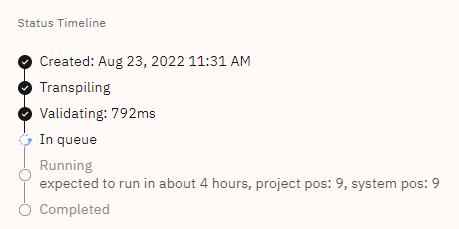

In [ ]:
#Probabilities from results:
prob_outputs = result_sim.quasi_dists[0].binary_probabilities()
counts       = {key: value*num_shots for key,value in prob_outputs.items()}
print(counts)

# Qiskit Visualization

In [ ]:
plot_histogram(prob_outputs)

## Aer simulators (LOCAL)

As a provider now we are using qiskit.Aer

In [ ]:
for bend in Aer.backends():
  print(bend.name)

Chosing the simulation backend

In [ ]:
sim_backend = Aer.get_backend("aer_simulator")

Then all steps are the same as for the IBM backend

In [ ]:
sim_transp_circ = transpile(circ1, sim_backend)

In [ ]:
sim_transp_circ.draw("mpl")

In [ ]:
sim_job = sim_backend.run(sim_transp_circ, shots = 5000)
sim_result = sim_job.result()

In [ ]:
#The number of counts per state:
sim_counts = sim_result.get_counts(sim_transp_circ)

In [ ]:
plot_histogram(sim_counts)